In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11665eb38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116b40a20>]], dtype=object)

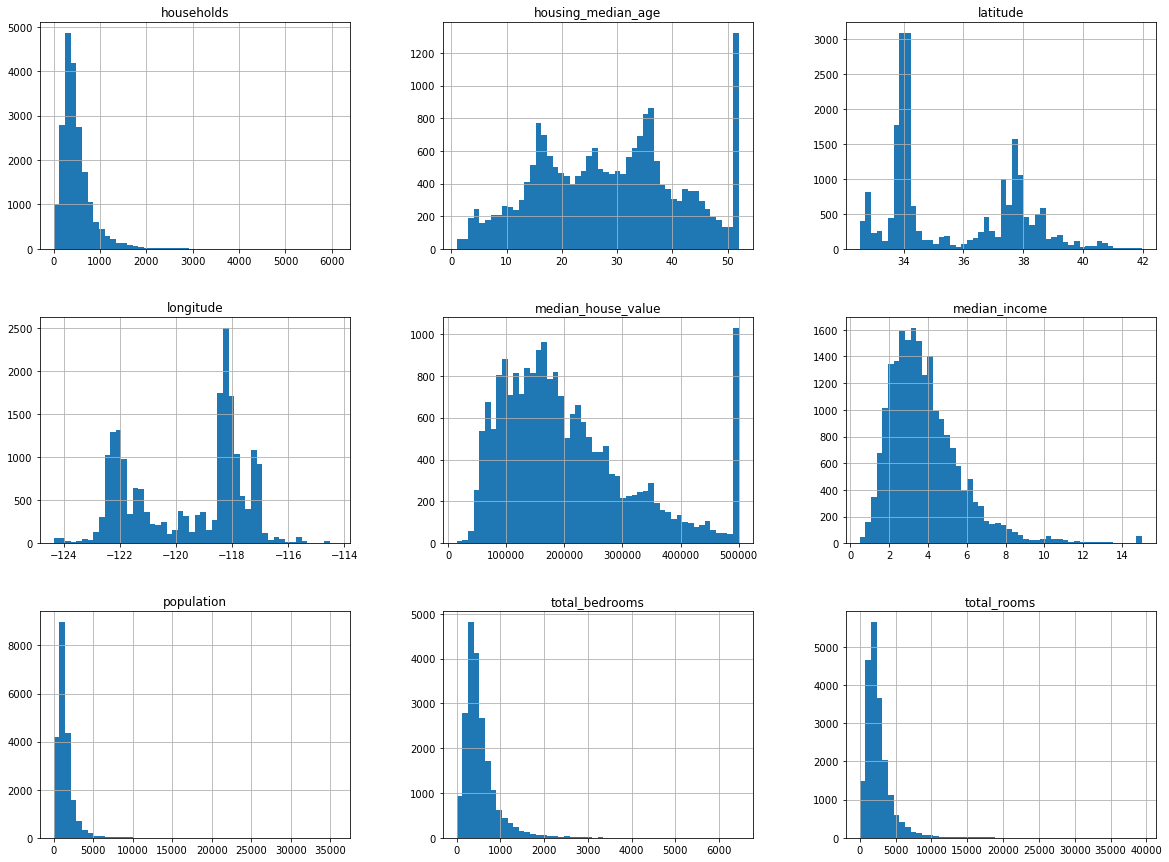

In [11]:
housing.hist(bins=50, figsize=(20,15))

In [12]:
#train test split

In [13]:
import hashlib

In [14]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [15]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [17]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [18]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) 

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [22]:
for set in (strat_train_set, strat_test_set):    
    set.drop(["income_cat"], axis=1, inplace=True)

<h4> Discover and Visualize </h4>

In [23]:
import matplotlib.pyplot as plt

In [24]:
housing = strat_train_set.copy()

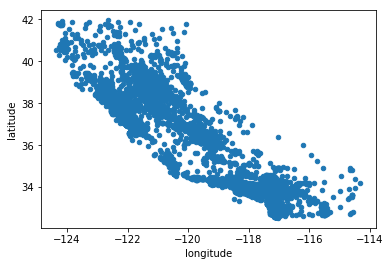

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude")

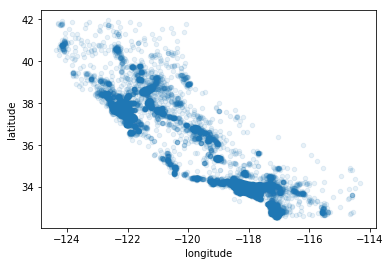

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#alpha set transparency

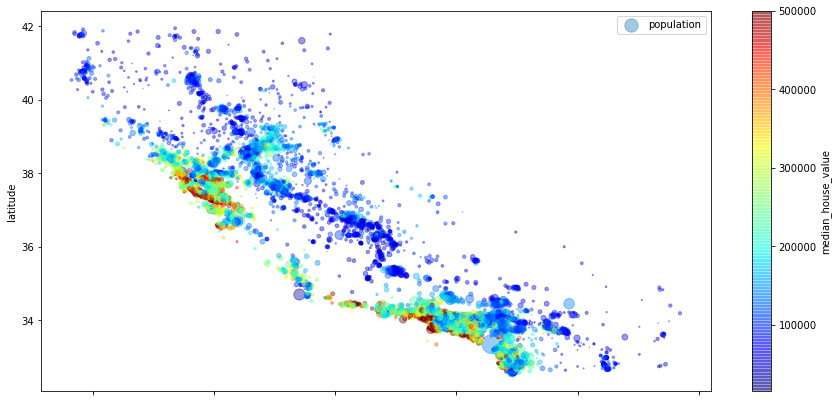

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7)
)

plt.legend()

In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [30]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117b7d240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f25f588>]], dtype=object)

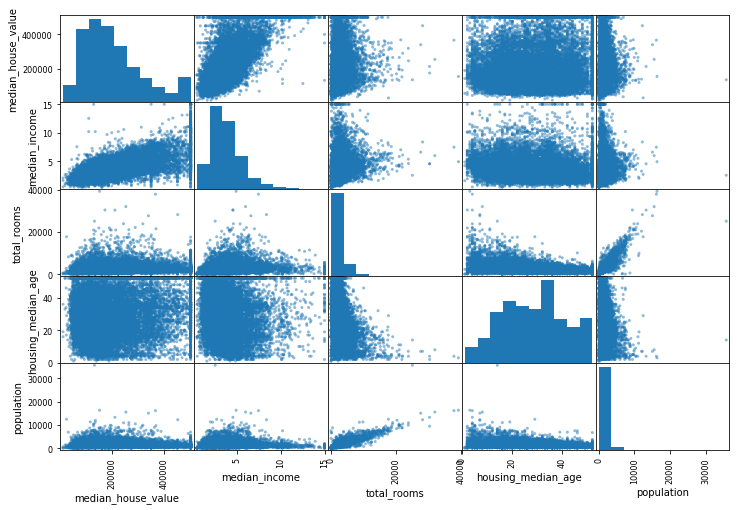

In [31]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "population"]
scatter_matrix(housing[attributes], figsize=(12, 8))

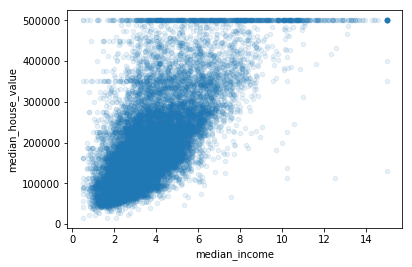

In [32]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

<h4> Feature Engineering </h4>

In [33]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [34]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [36]:
housing = strat_train_set.drop("median_house_value", axis=1)

In [37]:
housing_labels = strat_train_set["median_house_value"].copy()

Cria imputer para substituir NAs, como vamos usar mediana, temos que remover os atributos discretos

In [38]:
from sklearn.preprocessing import Imputer

In [39]:
imputer = Imputer(strategy="median")

In [40]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [41]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [42]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [43]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

Aplicar imputer nos dados

In [44]:
X = imputer.transform(housing_num)

In [45]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
encoder = LabelEncoder()

In [48]:
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [49]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

Nete caso, encoder numérico não é o ideal, pois gera um graus de semelhança entre as mais próximas. Vamos usar um one hot

In [50]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) #reshape(-1, 1) adiciona dimensao

In [53]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

Aplicando a transformacao de forma direta, sem tem que passar pelo processo de transformar para inteiros

In [54]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
#encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

<h4> Criando meu próprio transformer </h4>

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

In [56]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [57]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    #TransformerMixin propicia o metodo fit_transforme
    #BaseEstimator fornece os metodos get_params() e set_params()
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room        
        
    def fit(self, X, y=None):
        return self #nothing else to do in this case
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
    def added_features(add_bedrooms_per_room=True):
        new_features = ['rooms_per_household', 'population_per_household']
        if add_bedrooms_per_room:
            new_features.append('bedrooms_per_room')
        return new_features

In [58]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)

In [59]:
#housing_extra_attribs = attr_adder.fit_transform(housing.values)
housing_extra_attribs = attr_adder.transform(housing.values)

<h4>Pipeline</h4>

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [62]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

Adicionando LabelBinarizer()

In [63]:
from sklearn.pipeline import FeatureUnion

In [64]:
num_attribs = list(housing_num) #obtenho nome das colunas
cat_attribs = ["ocean_proximity"]

In [65]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [66]:
#devido a muddanca do sklearn 19.0, Label binarizer agora recebe apenas 2 argumentos. Vamos criar o nosso para utilizar o codigo do exemplo
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
        self.enc = LabelBinarizer(sparse_output=self.sparse_output)
    def fit(self, X, y=None):        
        return self.enc.fit(X)        
    def transform(self, X, y=None):       
        return self.enc.transform(X)

In [67]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [68]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', CustomLabelBinarizer()),
])

FeatureUnion recebe uma lista de tranformers (que podem ser pipelines), e quando aplica transform(), ele executara cada um da lista paralelamente

In [69]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

Todos os pipelines podem ser executados de forma simples

In [70]:
housing_prepared = full_pipeline.fit_transform(housing)

In [71]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

<h3>Training and Evaluating</h3>

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
housing_prepared = full_pipeline.fit_transform(housing)

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [76]:
some_data_prepared = full_pipeline.transform(some_data)
print("Preditcions:\t", lin_reg.predict(some_data_prepared))

Preditcions:	 [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [77]:
print("Labels:\t\t", list(some_labels))

Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

Treinando uma árvore de decisão

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
tree_reg = DecisionTreeRegressor()

In [82]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [83]:
housing_predictions = tree_reg.predict(housing_prepared)

In [84]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

<h3>Cross Validation</h3>

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

Scikit-Learn cross validation espera uma utility function (de maximização) ao invés de uma cost function (minimizaçao). Portanto, a função de score é a negativa do mse

In [87]:
tree_rmse_scores = np.sqrt(-scores)

In [88]:
tree_rmse_scores

array([ 70217.83241383,  66468.40958535,  70102.14129633,  69546.02350601,
        69574.41998647,  73103.11760159,  71871.22280352,  70753.24685529,
        75547.85492046,  69634.35388242])

In [89]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [90]:
display_scores(tree_rmse_scores)

Scores: [ 70217.83241383  66468.40958535  70102.14129633  69546.02350601
  69574.41998647  73103.11760159  71871.22280352  70753.24685529
  75547.85492046  69634.35388242]
Mean: 70681.8622851
Standard deviation: 2299.53151021


In [91]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [92]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [93]:
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
forest_reg = RandomForestRegressor()

In [96]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
forest_predictons = forest_reg.predict(housing_prepared)

In [98]:
forest_mse = mean_squared_error(forest_predictons, housing_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22422.568821605779

In [99]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [100]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [101]:
display_scores(forest_rmse_scores)

Scores: [ 52137.79471313  50734.21093263  51526.04178101  54087.61437959
  51392.25506056  56096.40813082  51370.04505704  49725.50148128
  56119.85458163  53051.0335423 ]
Mean: 52624.075966
Standard deviation: 2076.22842992


<h4>Salvando o modelo</h4>

In [102]:
from sklearn.externals import joblib

In [103]:
joblib.dump(forest_reg, "my_model_example.pkl")

['my_model_example.pkl']

In [104]:
my_model_loaded = joblib.load("my_model_example.pkl")

<h2>Fine tunning</h2>

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

Neste caso será realizada primeira a combinação 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8] e depois 'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4], totalizando 12 + 6 = 8 combinações

In [107]:
forest_reg = RandomForestRegressor()

In [108]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [109]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [110]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [111]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

*Quando GridSearchCV é uinicializado com refit=True (default), após encontrar os melhores parametros, o modelos é retreinado com todos os dados

In [112]:
cvres = grid_search.cv_results_

In [113]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64301.7327419 {'max_features': 2, 'n_estimators': 3}
55811.587168 {'max_features': 2, 'n_estimators': 10}
52917.770846 {'max_features': 2, 'n_estimators': 30}
61569.7140887 {'max_features': 4, 'n_estimators': 3}
53002.8591376 {'max_features': 4, 'n_estimators': 10}
50485.1908275 {'max_features': 4, 'n_estimators': 30}
58776.1701866 {'max_features': 6, 'n_estimators': 3}
52245.6465321 {'max_features': 6, 'n_estimators': 10}
50025.0684844 {'max_features': 6, 'n_estimators': 30}
58540.6024872 {'max_features': 8, 'n_estimators': 3}
52074.0510703 {'max_features': 8, 'n_estimators': 10}
49903.7242201 {'max_features': 8, 'n_estimators': 30}
63533.7334415 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54472.6004828 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59548.6399742 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52097.8005203 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59128.5056456 {'bootstrap': False, 'max_features': 4, 'n_estimat

Podemos usar o pipeline para identificar se queremos ou não adicionar/criar o bedrooms_per_room durante o preprocessamento

In [114]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', CustomLabelBinarizer()),
])
feature_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])
model_pipeline = Pipeline([
    ('features', feature_pipeline),
    ('rf_regression', RandomForestRegressor()),
])

In [115]:
param_grid = [{
    'features__num_pipeline__attribs_adder__add_bedrooms_per_room': [True, False],
    'rf_regression__n_estimators': [3, 10, 30], 'rf_regression__max_features': [2, 4, 6, 8],
}]

In [116]:
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [117]:
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('imp...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'features__num_pipeline__attribs_adder__add_bedrooms_per_room': [True, False], 'rf_regression__n_estimators': [3, 10, 30], 'rf_regression__max_features': [2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [118]:
grid_search.best_params_

{'features__num_pipeline__attribs_adder__add_bedrooms_per_room': False,
 'rf_regression__max_features': 6,
 'rf_regression__n_estimators': 30}

In [119]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64481.4492461 {'features__num_pipeline__attribs_adder__add_bedrooms_per_room': True, 'rf_regression__max_features': 2, 'rf_regression__n_estimators': 3}
55641.6493937 {'features__num_pipeline__attribs_adder__add_bedrooms_per_room': True, 'rf_regression__max_features': 2, 'rf_regression__n_estimators': 10}
52885.7362297 {'features__num_pipeline__attribs_adder__add_bedrooms_per_room': True, 'rf_regression__max_features': 2, 'rf_regression__n_estimators': 30}
60575.2191176 {'features__num_pipeline__attribs_adder__add_bedrooms_per_room': True, 'rf_regression__max_features': 4, 'rf_regression__n_estimators': 3}
53070.8927594 {'features__num_pipeline__attribs_adder__add_bedrooms_per_room': True, 'rf_regression__max_features': 4, 'rf_regression__n_estimators': 10}
50841.7280077 {'features__num_pipeline__attribs_adder__add_bedrooms_per_room': True, 'rf_regression__max_features': 4, 'rf_regression__n_estimators': 30}
58505.1202749 {'features__num_pipeline__attribs_adder__add_bedrooms_per_room':

<h3>Analisando o melhor modelo e seus erros</h3>

In [120]:
feature_importances = grid_search.best_estimator_.named_steps['rf_regression'].feature_importances_
# feature_importances = grid_search.best_estimator.feature_importances_ se for enviado o Random forest diretamente ao CV

In [121]:
feature_importances

array([  8.03439856e-02,   7.63128901e-02,   4.30173183e-02,
         1.90920728e-02,   1.84946972e-02,   1.92221860e-02,
         1.82442007e-02,   3.65477705e-01,   7.42264205e-02,
         1.08097733e-01,   1.51110747e-02,   1.53146795e-01,
         1.00012013e-04,   3.00845071e-03,   6.10445971e-03])

In [145]:
grid_search.best_params_

False

In [134]:
extra_attribs = CombinedAttributesAdder.added_features(grid_search.best_params_['features__num_pipeline__attribs_adder__add_bedrooms_per_room'])
cat_one_hot_attribs = list(encoder.classes_)

In [135]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [136]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36547770456819273, 'median_income'),
 (0.1531467945854901, 'INLAND'),
 (0.10809773260019602, 'population_per_household'),
 (0.080343985602335036, 'longitude'),
 (0.076312890056196764, 'latitude'),
 (0.074226420496561848, 'rooms_per_household'),
 (0.0430173183149948, 'housing_median_age'),
 (0.019222185976559496, 'population'),
 (0.019092072831546601, 'total_rooms'),
 (0.018494697216947537, 'total_bedrooms'),
 (0.018244200650556087, 'households'),
 (0.015111074664239253, '<1H OCEAN'),
 (0.0061044597128195131, 'NEAR OCEAN'),
 (0.0030084507103730483, 'NEAR BAY'),
 (0.00010001201299114037, 'ISLAND')]

In [137]:
final_model = grid_search.best_estimator_

In [138]:
X_test = strat_test_set.drop("median_house_value", axis=1)

In [139]:
y_test = strat_test_set["median_house_value"].copy()

In [140]:
final_predictions = final_model.predict(X_test)

In [141]:
final_mse = mean_squared_error(y_test, final_predictions)

In [142]:
final_rmse = np.sqrt(final_mse)